# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coeeficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  

Instead we would like to take an interative approach called **gradient descent**.



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of . For the kind of regression problems we've been examining, the resulting plot of loss vs.  will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

![alt text](gdformula.png)



### Gradient vector of the cost function

![alt text](vectorofpartialderivative.png)

We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [ ]:
### Number of Epochs 

Epochs is anoter hyperparamenter you can 

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [26]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [27]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [28]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

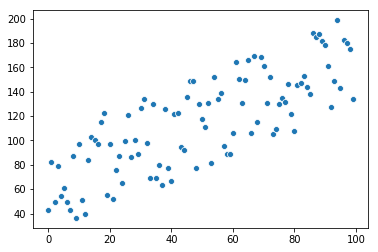

In [29]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 1075.478205
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 891.815355
[1.90969483 1.6824549 ]
Iteration 2 | Cost: 808.968441
[1.9127039  1.78196838]
Iteration 3 | Cost: 771.590874
[1.91522008 1.84879172]
Iteration 4 | Cost: 754.720595
[1.91740523 1.89366116]
Iteration 5 | Cost: 747.099380
[1.91936805 1.9237869 ]
Iteration 6 | Cost: 743.649619
[1.92118156 1.94401114]
Iteration 7 | Cost: 742.081241
[1.92289478 1.95758577]
Iteration 8 | Cost: 741.361391
[1.92454063 1.9666947 ]
Iteration 9 | Cost: 741.024241
[1.92614123 1.97280456]
Iteration 10 | Cost: 740.859693
[1.92771142 1.97690032]
Iteration 11 | Cost: 740.772993
[1.92926118 1.97964347]
Iteration 12 | Cost: 740.721403
[1.93079721 1.98147823]
Iteration 13 | Cost: 740.685649
[1.932324   1.98270295]
Iteration 14 | Cost: 740.657037
[1.93384458 1.98351797]
Iteration 15 | Cost: 740.631648
[1.93536097 1.98405786]
Iteration 16 | Cost: 740.607713
[1.93687454 1.98441296]
Iteration 17 | Cost: 740.584435
[1.9383862  1.98464398]
I

Iteration 765 | Cost: 723.893313
[3.05560372 1.96831919]
Iteration 766 | Cost: 723.871420
[3.05708316 1.96829689]
Iteration 767 | Cost: 723.849529
[3.05856258 1.96827458]
Iteration 768 | Cost: 723.827639
[3.06004195 1.96825228]
Iteration 769 | Cost: 723.805750
[3.06152129 1.96822998]
Iteration 770 | Cost: 723.783862
[3.06300059 1.96820767]
Iteration 771 | Cost: 723.761975
[3.06447985 1.96818537]
Iteration 772 | Cost: 723.740089
[3.06595907 1.96816307]
Iteration 773 | Cost: 723.718205
[3.06743826 1.96814077]
Iteration 774 | Cost: 723.696321
[3.06891741 1.96811847]
Iteration 775 | Cost: 723.674439
[3.07039652 1.96809617]
Iteration 776 | Cost: 723.652557
[3.07187559 1.96807387]
Iteration 777 | Cost: 723.630677
[3.07335463 1.96805157]
Iteration 778 | Cost: 723.608798
[3.07483363 1.96802927]
Iteration 779 | Cost: 723.586920
[3.07631259 1.96800697]
Iteration 780 | Cost: 723.565043
[3.07779151 1.96798468]
Iteration 781 | Cost: 723.543168
[3.0792704  1.96796238]
Iteration 782 | Cost: 723.52129

Iteration 1515 | Cost: 707.782114
[4.15471435 1.95174841]
Iteration 1516 | Cost: 707.761039
[4.15616591 1.95172652]
Iteration 1517 | Cost: 707.739965
[4.15761744 1.95170464]
Iteration 1518 | Cost: 707.718893
[4.15906893 1.95168275]
Iteration 1519 | Cost: 707.697821
[4.16052038 1.95166087]
Iteration 1520 | Cost: 707.676750
[4.1619718  1.95163899]
Iteration 1521 | Cost: 707.655681
[4.16342317 1.95161711]
Iteration 1522 | Cost: 707.634612
[4.16487452 1.95159522]
Iteration 1523 | Cost: 707.613545
[4.16632582 1.95157334]
Iteration 1524 | Cost: 707.592478
[4.16777709 1.95155146]
Iteration 1525 | Cost: 707.571413
[4.16922832 1.95152958]
Iteration 1526 | Cost: 707.550349
[4.17067952 1.95150771]
Iteration 1527 | Cost: 707.529286
[4.17213068 1.95148583]
Iteration 1528 | Cost: 707.508224
[4.1735818  1.95146395]
Iteration 1529 | Cost: 707.487163
[4.17503289 1.95144207]
Iteration 1530 | Cost: 707.466103
[4.17648393 1.95142019]
Iteration 1531 | Cost: 707.445044
[4.17793494 1.95139832]
Iteration 1532

[5.23168395 1.93551143]
Iteration 2265 | Cost: 692.272541
[5.23310819 1.93548996]
Iteration 2266 | Cost: 692.252253
[5.2345324  1.93546848]
Iteration 2267 | Cost: 692.231966
[5.23595656 1.93544701]
Iteration 2268 | Cost: 692.211680
[5.23738069 1.93542554]
Iteration 2269 | Cost: 692.191396
[5.23880479 1.93540407]
Iteration 2270 | Cost: 692.171112
[5.24022885 1.9353826 ]
Iteration 2271 | Cost: 692.150829
[5.24165287 1.93536113]
Iteration 2272 | Cost: 692.130547
[5.24307686 1.93533966]
Iteration 2273 | Cost: 692.110267
[5.24450081 1.93531819]
Iteration 2274 | Cost: 692.089987
[5.24592472 1.93529673]
Iteration 2275 | Cost: 692.069708
[5.2473486  1.93527526]
Iteration 2276 | Cost: 692.049431
[5.24877244 1.93525379]
Iteration 2277 | Cost: 692.029154
[5.25019625 1.93523233]
Iteration 2278 | Cost: 692.008879
[5.25162002 1.93521086]
Iteration 2279 | Cost: 691.988604
[5.25304375 1.9351894 ]
Iteration 2280 | Cost: 691.968330
[5.25446745 1.93516793]
Iteration 2281 | Cost: 691.948058
[5.25589111 1.

Iteration 3010 | Cost: 677.439794
[6.28418841 1.9196433 ]
Iteration 3011 | Cost: 677.420259
[6.28558595 1.91962223]
Iteration 3012 | Cost: 677.400725
[6.28698345 1.91960116]
Iteration 3013 | Cost: 677.381192
[6.28838091 1.91958009]
Iteration 3014 | Cost: 677.361659
[6.28977834 1.91955902]
Iteration 3015 | Cost: 677.342128
[6.29117574 1.91953796]
Iteration 3016 | Cost: 677.322598
[6.2925731  1.91951689]
Iteration 3017 | Cost: 677.303068
[6.29397042 1.91949582]
Iteration 3018 | Cost: 677.283540
[6.29536771 1.91947476]
Iteration 3019 | Cost: 677.264013
[6.29676496 1.91945369]
Iteration 3020 | Cost: 677.244486
[6.29816218 1.91943262]
Iteration 3021 | Cost: 677.224961
[6.29955936 1.91941156]
Iteration 3022 | Cost: 677.205437
[6.30095651 1.9193905 ]
Iteration 3023 | Cost: 677.185913
[6.30235362 1.91936943]
Iteration 3024 | Cost: 677.166391
[6.3037507  1.91934837]
Iteration 3025 | Cost: 677.146869
[6.30514774 1.91932731]
Iteration 3026 | Cost: 677.127349
[6.30654474 1.91930624]
Iteration 3027

Iteration 3593 | Cost: 666.217258
[7.09296624 1.90744973]
Iteration 3594 | Cost: 666.198292
[7.09434326 1.90742897]
Iteration 3595 | Cost: 666.179327
[7.09572024 1.90740821]
Iteration 3596 | Cost: 666.160363
[7.09709719 1.90738745]
Iteration 3597 | Cost: 666.141400
[7.0984741  1.90736669]
Iteration 3598 | Cost: 666.122438
[7.09985098 1.90734593]
Iteration 3599 | Cost: 666.103477
[7.10122782 1.90732517]
Iteration 3600 | Cost: 666.084517
[7.10260463 1.90730441]
Iteration 3601 | Cost: 666.065558
[7.1039814  1.90728366]
Iteration 3602 | Cost: 666.046600
[7.10535813 1.9072629 ]
Iteration 3603 | Cost: 666.027643
[7.10673484 1.90724214]
Iteration 3604 | Cost: 666.008687
[7.10811151 1.90722139]
Iteration 3605 | Cost: 665.989731
[7.10948814 1.90720063]
Iteration 3606 | Cost: 665.970777
[7.11086474 1.90717988]
Iteration 3607 | Cost: 665.951824
[7.1122413  1.90715913]
Iteration 3608 | Cost: 665.932871
[7.11361783 1.90713837]
Iteration 3609 | Cost: 665.913920
[7.11499432 1.90711762]
Iteration 3610

Iteration 4188 | Cost: 655.100962
[7.90614835 1.89518975]
Iteration 4189 | Cost: 655.082560
[7.90750473 1.8951693 ]
Iteration 4190 | Cost: 655.064159
[7.90886108 1.89514885]
Iteration 4191 | Cost: 655.045759
[7.9102174  1.89512841]
Iteration 4192 | Cost: 655.027360
[7.91157368 1.89510796]
Iteration 4193 | Cost: 655.008962
[7.91292993 1.89508751]
Iteration 4194 | Cost: 654.990565
[7.91428614 1.89506706]
Iteration 4195 | Cost: 654.972169
[7.91564232 1.89504662]
Iteration 4196 | Cost: 654.953774
[7.91699847 1.89502617]
Iteration 4197 | Cost: 654.935379
[7.91835458 1.89500573]
Iteration 4198 | Cost: 654.916986
[7.91971065 1.89498528]
Iteration 4199 | Cost: 654.898594
[7.92106669 1.89496484]
Iteration 4200 | Cost: 654.880202
[7.9224227  1.89494439]
Iteration 4201 | Cost: 654.861812
[7.92377867 1.89492395]
Iteration 4202 | Cost: 654.843422
[7.92513461 1.89490351]
Iteration 4203 | Cost: 654.825033
[7.92649052 1.89488306]
Iteration 4204 | Cost: 654.806645
[7.92784639 1.89486262]
Iteration 4205

[8.70180225 1.88319404]
Iteration 4780 | Cost: 644.368842
[8.70313845 1.8831739 ]
Iteration 4781 | Cost: 644.350985
[8.70447461 1.88315375]
Iteration 4782 | Cost: 644.333128
[8.70581074 1.88313361]
Iteration 4783 | Cost: 644.315273
[8.70714684 1.88311347]
Iteration 4784 | Cost: 644.297419
[8.70848291 1.88309332]
Iteration 4785 | Cost: 644.279565
[8.70981893 1.88307318]
Iteration 4786 | Cost: 644.261712
[8.71115493 1.88305304]
Iteration 4787 | Cost: 644.243861
[8.71249089 1.8830329 ]
Iteration 4788 | Cost: 644.226010
[8.71382682 1.88301276]
Iteration 4789 | Cost: 644.208160
[8.71516271 1.88299261]
Iteration 4790 | Cost: 644.190311
[8.71649857 1.88297247]
Iteration 4791 | Cost: 644.172463
[8.7178344  1.88295233]
Iteration 4792 | Cost: 644.154615
[8.71917019 1.8829322 ]
Iteration 4793 | Cost: 644.136769
[8.72050595 1.88291206]
Iteration 4794 | Cost: 644.118924
[8.72184167 1.88289192]
Iteration 4795 | Cost: 644.101079
[8.72317736 1.88287178]
Iteration 4796 | Cost: 644.083235
[8.72451302 1.

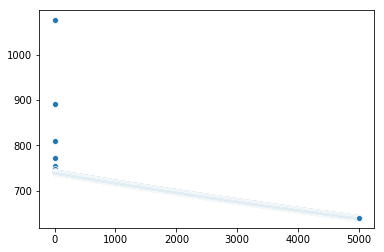

In [30]:
numEpochs= 5000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

![alt text](scalecontour.png)

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise